<a href="https://colab.research.google.com/github/dishankkalra23/Medical-Appointment-No-Shows/blob/main/Medical_Appointment_No_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: [Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments)

In this notebook we will be analysing Medical Appointment No show dataset available at Kaggle

>[Project: Medical Appointment No Shows](#scrollTo=BmfbjWRNOPeO)

>[Introduction](#scrollTo=Ty8z814ybwk5)

>[Importing Libraries](#scrollTo=zy3dSfeNPPCc)

>[Downloading dataset](#scrollTo=by5KNcWYVbXS)

>[Loading dataset](#scrollTo=N14ODJZWXEZd)

>[Summary of attributes](#scrollTo=onDkJqoYmhN3)

>[Data Wrangling](#scrollTo=zzG5_tl6_OJF)

>>[Changing Data type](#scrollTo=Av40NiNdoqHt)

>>[Adding new columns](#scrollTo=kislWLDHJly8)

>>[Dropping column](#scrollTo=w6Ew9cf6_ZRT)

>>[Removing Rows](#scrollTo=qNXsjzP1_rzd)

>>[Renaming columns](#scrollTo=HaJI_xlfgW12)

>>[Changing Target Variable](#scrollTo=FHgwFcz7kNr4)

>>[Appointment day before Scheduled Day](#scrollTo=TVfMxC9B8vOC)

>>[Checking Duplicates](#scrollTo=KLgc2zuUrD_9)

>[Exploratory Data Analysis](#scrollTo=rMEMqZ45HXKF)

>>>[Descriptive statistics](#scrollTo=m9SF62eI4sAD)

>>>[Correlation b/w columns of dataset](#scrollTo=67sSwwka4l20)

>>[Gender](#scrollTo=WcgzTUpVHeBB)

>>>[Number of males and females that showed up at appointment](#scrollTo=doajAKAP26Mk)

>>>[Total number of males and females in dataset](#scrollTo=tHoAOmv-3JX0)

>>>[Proportion of male and female patients](#scrollTo=VCkc-mqi3amn)

>>>[Proportion of male and female patients to show up for scheduled appointment](#scrollTo=25FL_9Ak3ixH)

>>>[Converting males and females to quantative variable to find correlation with other features in dataset](#scrollTo=Vvf1k8jF6sFU)

>>>[Function to find relationship b/w gender and different features](#scrollTo=Bo37oz8VR6jn)

>>>[Relation of showing up wrt gender and alcoholism](#scrollTo=7_wdoUDOR3z6)

>>>[Relation of showing up wrt gender and diabetes](#scrollTo=tEShAcy__WCg)

>>>[Relation of showing up wrt gender and hypertension](#scrollTo=Wcqb-5dXJAmG)

>>>[Relation of showing up wrt gender and Handicap](#scrollTo=MdBS29qlcb-l)

>>>>[Converting values in handicap to boolean values(0-non-handicap and 1-handicap)](#scrollTo=triGohxBj6gf)

>>>[Relation of showing up wrt gender and scholarship](#scrollTo=l0wvEBQqjWuy)

>>>[Relation of showing up wrt gender and sms reminder](#scrollTo=vUAnn8KShqH2)

>>[Age](#scrollTo=I_CNHEcq1hLx)

>>>[Patients with age above 100 are total 7](#scrollTo=3RnWhPpTbQaq)

>>>[Converting ages column from numerical to categorical](#scrollTo=mpgjV5QsDq7P)

>>[Waiting Days](#scrollTo=sJLu0SWRatit)

>>[Neighbourhood](#scrollTo=dRe7WyNYFttN)

>>>[Top Neighbourhoods with highest appointments](#scrollTo=a6to9l2zrhI7)

>>>[Top Neighbourhoods with lowest appointments](#scrollTo=_Gxr1qwhtm6f)

>>>[Total Appointments and actual show-up appointments](#scrollTo=WY3uzuLgCw7w)

>>>[Neighbourhood where show-up rate is high](#scrollTo=WQD_HHoHMmGy)

>>>[Neighbourhood where show-up rate is low](#scrollTo=EmJdhv9WMv2h)

>>[Day of the week](#scrollTo=mwH-m6BSLNcd)

>>[Relation of showing up wrt month](#scrollTo=EoemVexZp7Fa)

>[Conclusion](#scrollTo=_jWkcJ9e05Fq)

>[Limitations](#scrollTo=6QdaSperKHOb)



# Introduction

The Medical-Appointment-No-Shows dataset includes details of appointments of Brazilian people with the doctor.Data of appointments was combined from more than 45 clinics and hospitals at municipal level in Brazil betweeen 29/4/2016 and 6/6/2016

**Problem** - Many patients book the appointment with doctor then didn't show up on scheduled day. After so many studies happening on this data the average No-Show is 20%. The city has to lose [20 million](https://www.kaggle.com/joniarroba/noshowappointments/discussion/38330#275226) every year due to patients not showing at their scheduled appointment. 

**Objective** of the analysis is to investigate the reason why some patients do not show up to their scheduled appointments. 

# Importing Libraries

In [1]:
pip install squarify

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib

# Downloading dataset

In [3]:
! pip install -q kaggle

In [ ]:
# Upload your kaggle.json file containing API token
from google.colab import files
files.upload()

In [5]:
# Move the downloaded file to a location ~/.kaggle/kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

# You need to give proper permissions to the file (since this is a hidden folder)
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Copy API command to download dataset
! kaggle datasets download -d joniarroba/noshowappointments
! unzip \*.zip
! rm *.zip

  0% 0.00/2.40M [00:00<?, ?B/s]
100% 2.40M/2.40M [00:00<00:00, 80.7MB/s]
Archive:  noshowappointments.zip
  inflating: KaggleV2-May-2016.csv   


# Loading dataset

In [7]:
df = pd.read_csv('/content/KaggleV2-May-2016.csv')

In [8]:
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
26342,4.543514e+12,5651985,F,2016-05-03T09:32:09Z,2016-05-04T00:00:00Z,8,JABOUR,0,0,0,0,0,0,No
16834,8.529638e+14,5647880,F,2016-05-02T14:35:00Z,2016-05-13T00:00:00Z,50,SANTA MARTHA,0,1,0,0,0,0,No
18436,6.295237e+13,5676423,F,2016-05-09T15:42:29Z,2016-05-09T00:00:00Z,33,MARIA ORTIZ,0,0,0,0,0,0,No
69335,5.115987e+12,5658025,F,2016-05-04T10:19:32Z,2016-05-04T00:00:00Z,37,SÃO PEDRO,0,0,0,0,0,0,No
96225,2.388782e+14,5711915,F,2016-05-18T08:13:07Z,2016-06-03T00:00:00Z,27,JARDIM DA PENHA,0,0,0,0,0,1,No


# Summary of attributes

A concise summary of a DataFrame including the index dtype and columns, non-null values and memory usage.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset consists of **14 variables** as follows:

**PatientId** : Unique identification of a patient

**AppointmentID** : Unique identification of each appointment

**Gender**: Male or Female

**ScheduledDay**: The date on which appointment was scheduled

**AppointmentDay**: The date on which pateint has to show-up for the appointment

**Age**: How old is the patient

**Neighbourhood**: Place where pateint lives (where pateint comes from to visit the doctor)

**Scholarship**: Whether the patient is enrolled in [Bolsa_Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia), which is a social welfare program of the Government of Brazil

**Hipertension**: Hypertension, also known as high blood pressure. Part of patient's medical history.

**Diabetes**: Part of patient's medical history.

**Alcoholism**: Drinking of alcohol that results in significant mental or physical health problems. Part of patient's medical history.

**Handcap**: Handicap, part of patient's medical history.

**SMS_received**: Frequent reminders of scheduled appointment.

**No-show**: Whether the patient attended the appointment or not. 'Yes' means the patient did not attended the appointment

> 

> No missing values in data

> **Data type of columns to be fixed,**
1. PatientId is the unique id for identification of a patient and datatype of PatientId is float that is inappropriate.
2. ScheduledDay and AppointmentDay can be used in analysis if we convert them into date-time format. We can extract the date, day of the week, month and time from the ScheduledDay and AppointmentDay


# Data Wrangling

In this section we will assess our dataset and clean the dataset

## Changing Data type

Changing data type PatientID to pandas datetime 

In [10]:
df.PatientId = df.PatientId.astype('int')
df.PatientId.dtypes

dtype('int64')

In [11]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df[['ScheduledDay','AppointmentDay']].dtypes

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object

## Adding new columns
**Adding new columns** -  Scheduled date, Scheduled time and Appointment date, Appointment time, Appointment day of week, Appointment month

**ScheduleDate & AppointmentDate** stores date of Scheduled Day and Appointment Day

**ScheduledTime & AppointmentTime** stores time of Scheduled Day and Appointment Day

**appointment_dow** stores the day of the week of Appointment Day

**appointment_month** stores the month of Appointment




In [12]:
df['ScheduledTime'] = pd.to_datetime(df.ScheduledDay).dt.time
df['AppointmentTime'] = pd.to_datetime(df.AppointmentDay).dt.time

In [13]:
df['appointment_dow'] = pd.to_datetime(df.AppointmentDay).dt.day_name()
df['appointment_month'] = pd.to_datetime(df.AppointmentDay).dt.month_name()

In [14]:
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date

In [15]:
df.AppointmentTime.sample(5)

95674    00:00:00
7756     00:00:00
36013    00:00:00
17173    00:00:00
49566    00:00:00
Name: AppointmentTime, dtype: object

In [16]:
df.AppointmentTime.nunique()

1

> Appointment Time is 00:00:00 in all the rows, it is not relevant to analysis. Hence dropping AppointmentTime column 

## Dropping column

Removing appointment time column from dataset

In [17]:
df.drop(columns='AppointmentTime',inplace=True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'ScheduledTime', 'appointment_dow', 'appointment_month'],
      dtype='object')

## Removing Rows

Removing records/rows which have age in negative

In [18]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

> Age can never be negative, removing rows which have age less than 0

In [19]:
df_less_0 = df.query('Age < 0')
df_less_0.Age.count()

1

> Only single row with age less than 0

In [20]:
df = df.query('Age >= 0')

## Renaming columns

Using [snake case](https://en.wikipedia.org/wiki/Snake_case)(lower case with underscores) where column name should be in lowercase seperated with underscore. In this way we can access the column using period like this df.column_name

In [21]:
labels = {'PatientId':"patient_id", 'AppointmentID':'appointment_id', 'Gender':'gender', 
        'ScheduledDay':'scheduled_day',
       'AppointmentDay':'appointment_day', 'Age':'age', 'Neighbourhood':'neighbourhood', 
       'Scholarship':'scholarship', 'Hipertension':'hypertension',
       'Diabetes':'diabetes', 'Alcoholism':'alcoholism', 'Handcap':'handicap', 
       'SMS_received':'sms_received', 'No-show':'show',
       'ScheduledTime':'scheduled_time'}
df.rename(columns=labels,inplace=True)

In [22]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'show', 'scheduled_time', 'appointment_dow', 'appointment_month'],
      dtype='object')

## Changing Target Variable 

Changing target variable from no_show(to show) to avoid misconception and easily understand show-up rates

Substituting **Yes with 0** and **No with 1**

In [23]:
df.show = df.show.map({'Yes':0,'No':1})
df.show.astype(int);

## Appointment day before Scheduled Day

Appointment day i.e the day on which pateint has to visit doctor is before Scheduled Day i.e. the day on which appointment was booked.

In [24]:
df_error = df[df.scheduled_day > df.appointment_day ][['patient_id','appointment_id','scheduled_day','appointment_day','show']]
df_error

,patient_id,appointment_id,scheduled_day,appointment_day,show
27033,7839272661752,5679978,2016-05-10,2016-05-09,0
55226,7896293967868,5715660,2016-05-18,2016-05-17,0
64175,24252258389979,5664962,2016-05-05,2016-05-04,0
71533,998231581612122,5686628,2016-05-11,2016-05-05,0
72362,3787481966821,5655637,2016-05-04,2016-05-03,0


> In the first row, appointment day is **9th May** and scheduled day is **10th May** which doesn't make any sense. So, dropping rows where appointment day is before scheduled day

In [25]:
print('Number of rows with appointment day before scheduled day:',df_error.patient_id.count())

Number of rows with appointment day before scheduled day: 5


In [26]:
print('Number of rows before dropping above rows:', df.patient_id.count())

Number of rows before dropping above rows: 110526


In [27]:
df = df[df.scheduled_day <= df.appointment_day ]
print('Number of rows after dropping above rows:', df.patient_id.count())

Number of rows after dropping above rows: 110521


## Checking Duplicates

In [28]:
df.duplicated().sum()

0

> No duplicate rows in data

<a id='eda'></a>
# Exploratory Data Analysis

### Descriptive statistics

Summarizing features and providing quantative summary about the features in dataset

In [102]:
df.groupby('show').mean().iloc[:,2:]

,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
show,,,,,,
0,0.115533,0.169042,0.064085,0.030340,0.018150,0.438469
1,0.093904,0.204394,0.073838,0.030417,0.020792,0.291337


> Patients having sholarship i.e 11% patients with scholarship doesn't appeared for the scheduled appointment while people with no scholarship are more towards attending their appointment.

> Patients having hypertension and diabetes i.e 7% and 3% are more likely to show for their appointment because of disease

> It seems like patients consuming alcohol has no effect over no-show

> Patients receiving reminders are more likely to do not show for the appointments. 43% of patients who received the sms reminder regarding upcoming appointment missed the appointment. 

> It seems like failing to remember the apponintment is not an issue for no-show 


In [30]:
df.describe().iloc[2:,2:]

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
std,23.109885,0.297682,0.397929,0.258272,0.17169,0.161494,0.466879,0.401419
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.00000,4.000000,1.000000,1.000000


### Correlation b/w columns of dataset

In [31]:
df.corr().iloc[2:,2:]

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
age,1.000000,-0.092469,0.504599,0.292398,0.095811,0.078101,0.012629,0.060320
scholarship,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,-0.029166
hypertension,0.504599,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,0.035662
diabetes,0.292398,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,0.015158
alcoholism,0.095811,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,0.000181
handicap,0.078101,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,0.006290
sms_received,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,-0.126502
show,0.060320,-0.029166,0.035662,0.015158,0.000181,0.006290,-0.126502,1.000000


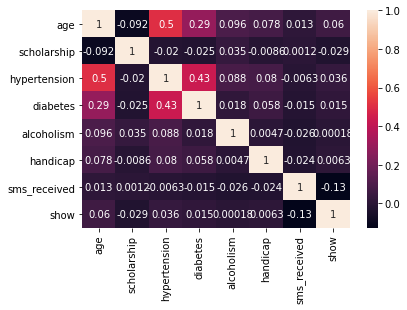

In [32]:
sns.heatmap(df.corr().iloc[2:,2:],annot=True)
plt.show()

> There is no strong correlation b/w show-up and other features

> There is positive correlation b/w diabetes and hypertension i.e 0.43 

> Patients getting sms reminders and show-up rate have negative correlation. It means it is possible that patients getting reminders regarding appointment are more likely to no-show.

## Gender

### Number of males and females that showed up at appointment

In [33]:
gender_show = df.groupby('gender').show.sum()
gender_show

gender
F    57245
M    30962
Name: show, dtype: int64

### Total number of males and females in dataset

In [34]:
gender_total = df.groupby('gender').patient_id.count()
gender_total

gender
F    71836
M    38685
Name: patient_id, dtype: int64

### Proportion of male and female patients

In [35]:
prop_female_patients = gender_total.F/(gender_total.F + gender_total.M)*100
prop_female_patients

64.99760226563278

In [36]:
prop_male_patients = gender_total.M/(gender_total.F + gender_total.M)*100
prop_male_patients

35.00239773436722

In [37]:
def horizontal_bars(name,prop,title):
  '''
  name: column name
  prop: proportion of male/female show-up 
  title: title of graph
  return: horizontal bar graph
  '''
  fig, ax = plt.subplots(figsize =(10, 5))
  ax.barh(name, prop)

  # To add grid
  ax.grid(b = True, color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.2)

  # To remove axes
  for s in ['top', 'bottom', 'left', 'right']:
      ax.spines[s].set_visible(False)

  # To remove x and y ticks
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')

  plt.xticks(fontsize=10)
  plt.yticks(fontsize=12)

  # Add padding between axes and labels
  ax.xaxis.set_tick_params(pad = 5)
  ax.yaxis.set_tick_params(pad = 15)

  plt.xlabel('\n\nPercentage of Patients',fontsize=12)
  plt.ylabel('Gender',fontsize=12)
  ax.set_title(title,fontsize = 15 )

  for i in ax.patches:
      plt.text(i.get_width()+0.01, i.get_y()+0.4,
              str(round((i.get_width()), 2)),
              fontsize = 12, fontweight ='bold',
              color ='grey')
      
  plt.show()

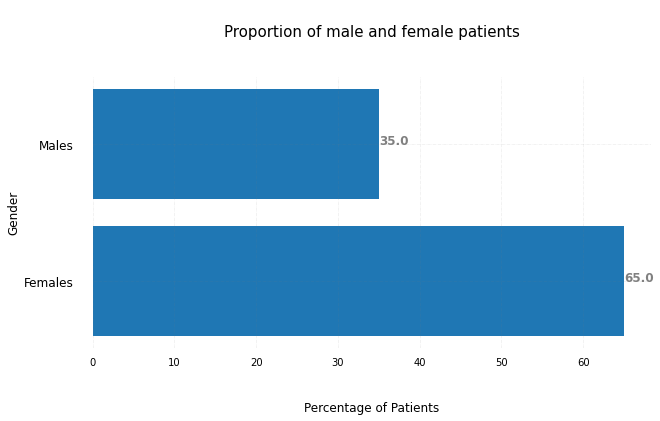

In [38]:
gend = ['Females','Males']
prop = [prop_female_patients,prop_male_patients]
title = '\nProportion of male and female patients\n\n'
horizontal_bars(gend,prop,title)

> Proportion of male and female patients are 35% and 65% respectively

### Proportion of male and female patients to show up for scheduled appointment

In [39]:
prop_female_show = (gender_show.F/gender_total.F)*100
prop_female_show

79.68845704103792

In [40]:
prop_male_show = (gender_show.M/gender_total.M)*100
prop_male_show

80.0361897376244

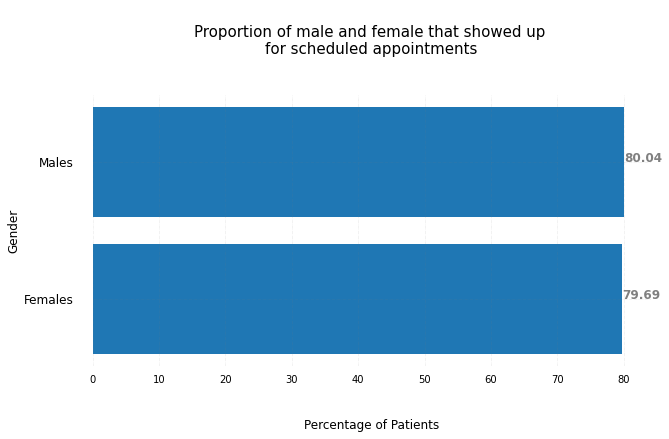

In [41]:
gend = ['Females','Males']
prop = [prop_female_show,prop_male_show]
title = '\nProportion of male and female that showed up \nfor scheduled appointments\n\n'

horizontal_bars(gend,prop,title)

> Proportion of males and females showing-up for scheduled appointments are almost equal i.e 80%

### Converting males and females to quantative variable to find correlation with other features in dataset

In [42]:
df_new = df.copy()
df_new.gender = df_new.gender.map({'F':1,'M':0})
df_new.corr().iloc[2:,2:]

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
gender,1.000000,0.106439,0.114297,0.055721,0.032555,-0.106170,-0.022787,0.046301,-0.004132
age,0.106439,1.000000,-0.092469,0.504599,0.292398,0.095811,0.078101,0.012629,0.060320
scholarship,0.114297,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,-0.029166
hypertension,0.055721,0.504599,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,0.035662
diabetes,0.032555,0.292398,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,0.015158
alcoholism,-0.106170,0.095811,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,0.000181
handicap,-0.022787,0.078101,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,0.006290
sms_received,0.046301,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,-0.126502
show,-0.004132,0.060320,-0.029166,0.035662,0.015158,0.000181,0.006290,-0.126502,1.000000


> There is no direct relation of gender with any other feature 

### Function to find relationship b/w gender and different features

In [43]:
def rel_with_gender(_feature,_title,legend_title):
  extracted_df = pd.pivot_table(data=df,index=['gender',_feature],values='show')
  extracted_df.show = extracted_df.show*100
  extracted_df.reset_index(inplace=True)

  display(extracted_df)

  # To set figure size 
  plt.figure(figsize=(8,6),dpi=70)
  
  # To make bar plot
  graph = sns.barplot(data=extracted_df,x='gender',y='show',hue=_feature,palette='Paired');
  
  # To add padding b/w axis and ticks
  graph.xaxis.set_tick_params(pad = 10)
  graph.yaxis.set_tick_params(pad = 3)

  graph.set_xlabel('Gender',fontsize=13)
  graph.set_ylabel('% of people who showed up\n',fontsize=13)
  graph.set_title(_title,fontsize=16)
  graph.set_xticklabels(['Females','Males'],fontsize=11.5)

  # To set y-axis limits
  graph.set_ylim(0,90)

  # To place legend outside top right corner of plot
  plt.legend(title=legend_title,bbox_to_anchor=(1.02, 0.5), loc='upper left', borderaxespad=0)
  # plt.legend(title='Consume Alcohol',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,labels=['No','Yes'])
  # plt.legend(title='Alcoholism',labels=['A', 'A'], loc='upper left')

  # To remove spines 
  sns.despine( left=True, bottom=True)

  print('\n')
  # TO DO: Add padding between axes and labels
  plt.show(graph)


### Relation of showing up wrt gender and alcoholism 

,gender,alcoholism,show
0,F,0,79.772846
1,F,1,74.816026
2,M,0,79.878516
3,M,1,82.732803


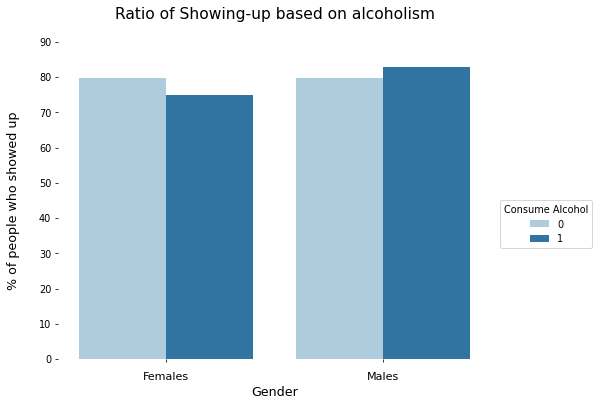

In [44]:
rel_with_gender(_feature='alcoholism',_title='Ratio of Showing-up based on alcoholism\n',legend_title='Consume Alcohol')

> There is no signifigant relation of showing up with alcoholism wrt gender. 

> There is an increase of 3.6% in show up rate of males who consume alcohol.

> On the other hand there is decrease of 6.2% in show up rate with females who consume alcohol.

>So we can't conclude that alcoholism wrt gender determines showing up for appointment

### Relation of showing up wrt gender and diabetes 

,gender,diabetes,show
0,F,0,79.504756
1,F,1,81.858723
2,M,0,79.888852
3,M,1,82.327771


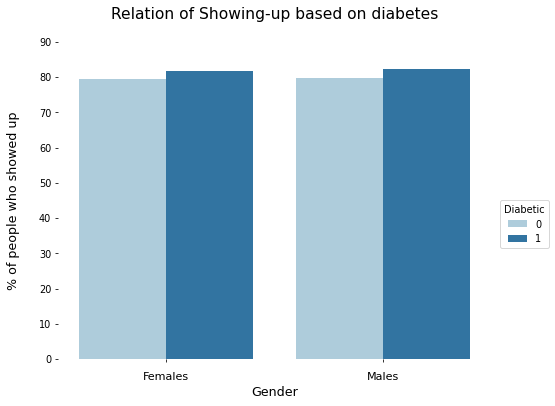

In [45]:
rel_with_gender(_feature='diabetes',_title='Relation of Showing-up based on diabetes\n',legend_title='Diabetic')

> There is an increase of show-up rate with diabetic males and females who 

### Relation of showing up wrt gender and hypertension

,gender,hypertension,show
0,F,0,78.876755
1,F,1,82.678141
2,M,0,79.492909
3,M,1,82.745280


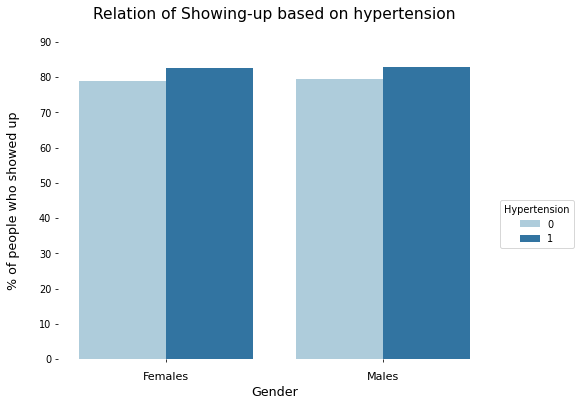

In [46]:
rel_with_gender(_feature='hypertension',_title='Relation of Showing-up based on hypertension\n',legend_title='Hypertension')

> There is an increase of show-up rate with males and females who have hypertension

### Relation of showing up wrt gender and Handicap


#### Converting values in handicap to boolean values(0-non-handicap and 1-handicap)

In [47]:
df.handicap.unique()

array([0, 1, 2, 3, 4])

In [48]:
df.handicap = df.handicap.map({0:0, 1:1, 2:1, 3:1, 4:1})

In [49]:
df.handicap.unique()

array([0, 1])

,gender,handicap,show
0,F,0,79.660368
1,F,1,81.225756
2,M,0,79.965549
3,M,1,82.842105


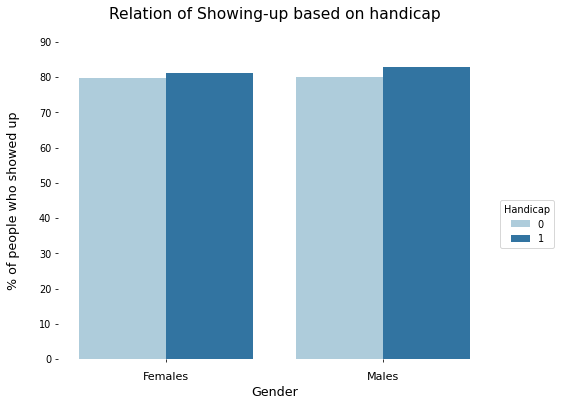

In [50]:
rel_with_gender(_feature='handicap',_title='Relation of Showing-up based on handicap\n',legend_title='Handicap')

> There is an increase of show-up rate with males and females who have disabilities

### Relation of showing up wrt gender and scholarship

,gender,scholarship,show
0,F,0,80.177191
1,F,1,76.211454
2,M,0,80.230117
3,M,1,76.494024


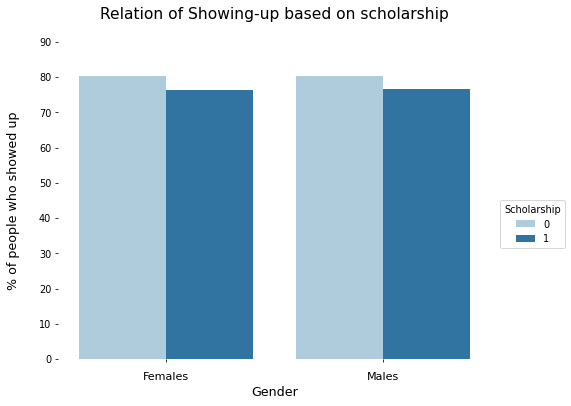

In [51]:
rel_with_gender(_feature='scholarship',_title='Relation of Showing-up based on scholarship\n',legend_title='Scholarship')

> People with scholarship irrespective of their gender are more tend to not show-up for appointment

### Relation of showing up wrt gender and sms reminder

,gender,sms_received,show
0,F,0,83.476089
1,F,1,72.233700
2,M,0,82.999453
3,M,1,72.836879


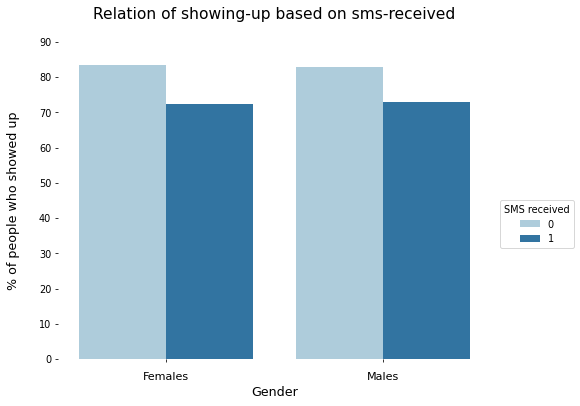

In [52]:
rel_with_gender('sms_received','Relation of showing-up based on sms-received\n','SMS received')

> It is evident from above graph people who got sms reminders irrespective of their gender were the ones with less show-up rate

## Age 
How age can determine not showing to the appointment

In [53]:
df.age.describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

### Patients with age above 100 are total 7
Considering patients with age above 100 as an outlier 

In [54]:
df.query("age > 100").patient_id.count()

7

In [55]:
def ranges(feature,bins_edges,bins_names):
  arr = df[feature]
  df[feature] = pd.cut(x=arr,bins=bins_edges,labels=bins_names)

In [56]:
def create_bar_plot(_feature,_title,x_label):
  extracted_df = pd.pivot_table(data=df,index=_feature,values='show')
  extracted_df.show = extracted_df.show*100
  extracted_df.reset_index(inplace=True)

  display(extracted_df)

  # To set figure size 
  plt.figure(figsize=(8,6),dpi=70)
  
  # To make bar plot
  graph = sns.barplot(data=extracted_df,x=_feature,y='show',palette="crest");

  # To add padding b/w axis and ticks
  graph.xaxis.set_tick_params(pad = 9)
  graph.yaxis.set_tick_params(pad = 3)
  graph.tick_params(bottom=False)

  if _feature == 'waiting_days':
    plt.xticks(rotation=45)

  graph.set_xlabel(x_label,fontsize=13)
  graph.set_ylabel('% of people who showed up\n',fontsize=13)
  graph.set_title(_title,fontsize=16)

  # To set y-axis limits
  graph.set_ylim(0,90)

  # To remove spines 
  sns.despine( left=True, bottom=True)

  print('\n')
  # TO DO: Add padding between axes and labels
  plt.show(graph)


### Converting ages column from numerical to categorical 

Ranges on the basis of standard deviation i.e. 23

Children(0-22),Youth(23-45),Adult(46-68),Senior(69-100)


,age,show
0,Children,76.901764
1,Youth,77.833974
2,Adult,83.215262
3,Senior,84.411670


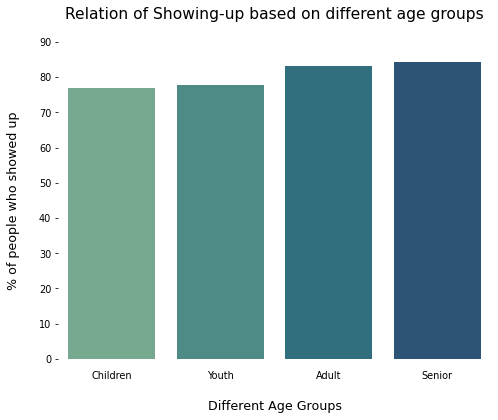

In [57]:
feature = 'age'
bins_edges = [0,23,46,69,101]
bins_names = ['Children','Youth','Adult','Senior']
print('Children(0-22),Youth(23-45),Adult(46-68),Senior(69-100)')
ranges(feature,bins_edges,bins_names)
create_bar_plot(_feature=feature,_title='Relation of Showing-up based on different age groups\n',x_label='\nDifferent Age Groups')

## Waiting Days

In [58]:
df['waiting_days'] = df.appointment_day - df.scheduled_day

In [59]:
df.waiting_days.dtypes

dtype('<m8[ns]')

In [60]:
df.waiting_days = df.waiting_days.astype('str')
df.waiting_days = df.waiting_days.apply(lambda x: x.split()[0])
df.waiting_days = df.waiting_days.astype('int')

In [61]:
df.waiting_days.dtypes

dtype('int64')

In [62]:
df.waiting_days.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

Note: Here waiting days are delay in days of appointment and scheduled day


,waiting_days,show
0,0-15,83.516728
1,16-30,67.327312
2,31-45,65.317434
3,46-60,67.912946
4,61-75,70.997846
5,76-90,71.182266
6,91-115,78.873239
7,116-130,91.666667
8,131-145,54.545455
9,146-160,36.363636


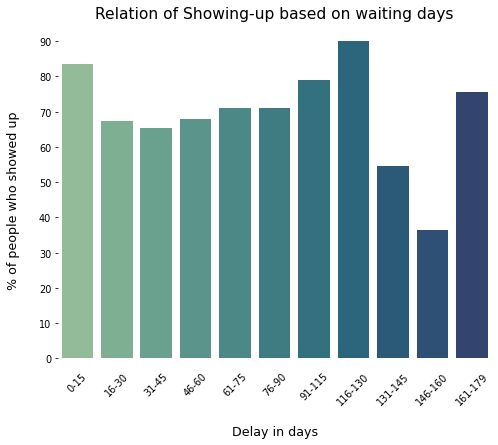

In [63]:
print('Note: Here waiting days are delay in days of appointment and scheduled day')
feature = 'waiting_days'
bins_edges = [-1,16,31,46,61,76,91,116,131,146,161,180]
bins_names = ['0-15','16-30','31-45','46-60','61-75','76-90','91-115','116-130','131-145','146-160','161-179']
ranges(feature,bins_edges,bins_names)
create_bar_plot(_feature=feature,_title='Relation of Showing-up based on waiting days\n',x_label='\nDelay in days')

>There is no direct relation of No-Show with waiting days

## Neighbourhood
Place where patient comes from

In [64]:
neighbour_df = pd.DataFrame()

In [65]:
neighbour_df['total_appointments'] = df.groupby(by='neighbourhood').show.count()
neighbour_df['show_appointments'] = df.groupby(by='neighbourhood').show.sum()
neighbour_df['show_prop'] = df.groupby(by='neighbourhood').show.mean()
neighbour_df.reset_index(inplace=True)

In [66]:
neighbour_df.sample(10)

,neighbourhood,total_appointments,show_appointments,show_prop
39,JARDIM DA PENHA,3877,3246,0.837245
59,RESISTÊNCIA,4430,3525,0.795711
14,CRUZAMENTO,1398,1094,0.782546
20,ENSEADA DO SUÁ,235,183,0.778723
75,SÃO CRISTÓVÃO,1836,1473,0.802288
65,SANTA LÚCIA,438,352,0.803653
5,BELA VISTA,1907,1523,0.798637
17,DO CABRAL,560,472,0.842857
70,SANTOS DUMONT,1276,907,0.710815
30,ILHA DE SANTA MARIA,1885,1524,0.808488


### Top Neighbourhoods with highest appointments 

In [67]:
high_appointment_neigh = neighbour_df.sort_values('total_appointments',ascending=False).head(10)
high_appointment_neigh

,neighbourhood,total_appointments,show_appointments,show_prop
38,JARDIM CAMBURI,7717,6252,0.810159
43,MARIA ORTIZ,5805,4586,0.790009
59,RESISTÊNCIA,4430,3525,0.795711
39,JARDIM DA PENHA,3877,3246,0.837245
36,ITARARÉ,3514,2591,0.737336
10,CENTRO,3334,2631,0.789142
78,TABUAZEIRO,3131,2559,0.817311
66,SANTA MARTHA,3131,2635,0.841584
40,JESUS DE NAZARETH,2853,2157,0.756046
8,BONFIM,2773,2223,0.801659


In [68]:
def color_squarify(data_frame):
  cmap = matplotlib.cm.tab20c
  mini=min(data_frame.total_appointments)
  maxi=max(data_frame.total_appointments)
  norm = matplotlib.colors.Normalize(mini,maxi)
  colors = [cmap(norm(value)) for value in data_frame.total_appointments]
  return colors

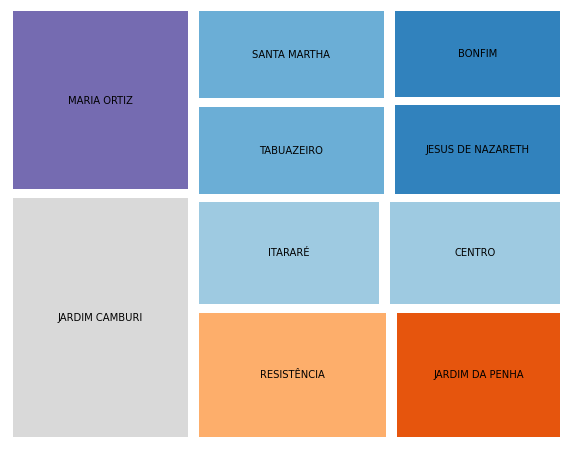

In [69]:
plt.figure(figsize=(10,8))
squarify.plot(sizes=high_appointment_neigh.total_appointments,
              label=high_appointment_neigh.neighbourhood,
              color = color_squarify(high_appointment_neigh),
              pad=True)
plt.axis('off')
plt.show()

> From JARDIM CAMBURI there were highest appointments i.e. 7717

### Top Neighbourhoods with lowest appointments

In [70]:
low_appointment_neigh = neighbour_df.sort_values('total_appointments').head(5)

In [71]:
low_appointment_neigh.neighbourhood.iloc[0] = 'PQ'
low_appointment_neigh.neighbourhood.iloc[1] = 'IOCDT'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [72]:
low_appointment_neigh

,neighbourhood,total_appointments,show_appointments,show_prop
51,PQ,1,1,1.000000
34,IOCDT,2,0,0.000000
0,AEROPORTO,8,7,0.875000
32,ILHA DO FRADE,10,8,0.800000
31,ILHA DO BOI,35,32,0.914286


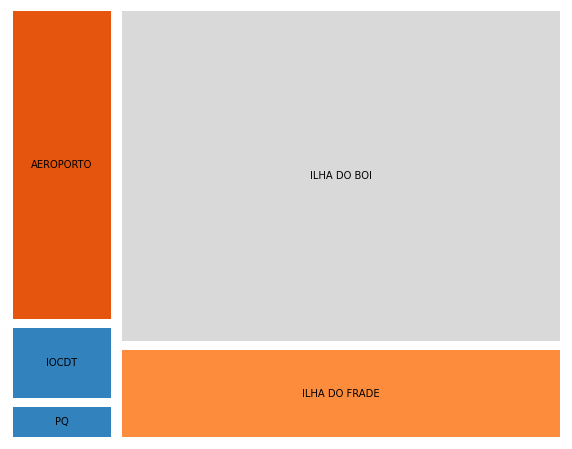

In [73]:
plt.figure(figsize=(10,8))
squarify.plot(sizes=low_appointment_neigh.total_appointments,
              label=low_appointment_neigh.neighbourhood,
              color = color_squarify(low_appointment_neigh),
              pad=True)
plt.axis('off')
plt.show()

> From Parque Industrial(PQ) there were only one appointment

### Total Appointments and actual show-up appointments

Red bars represents total appointments

Blue bars represents actual show appointments



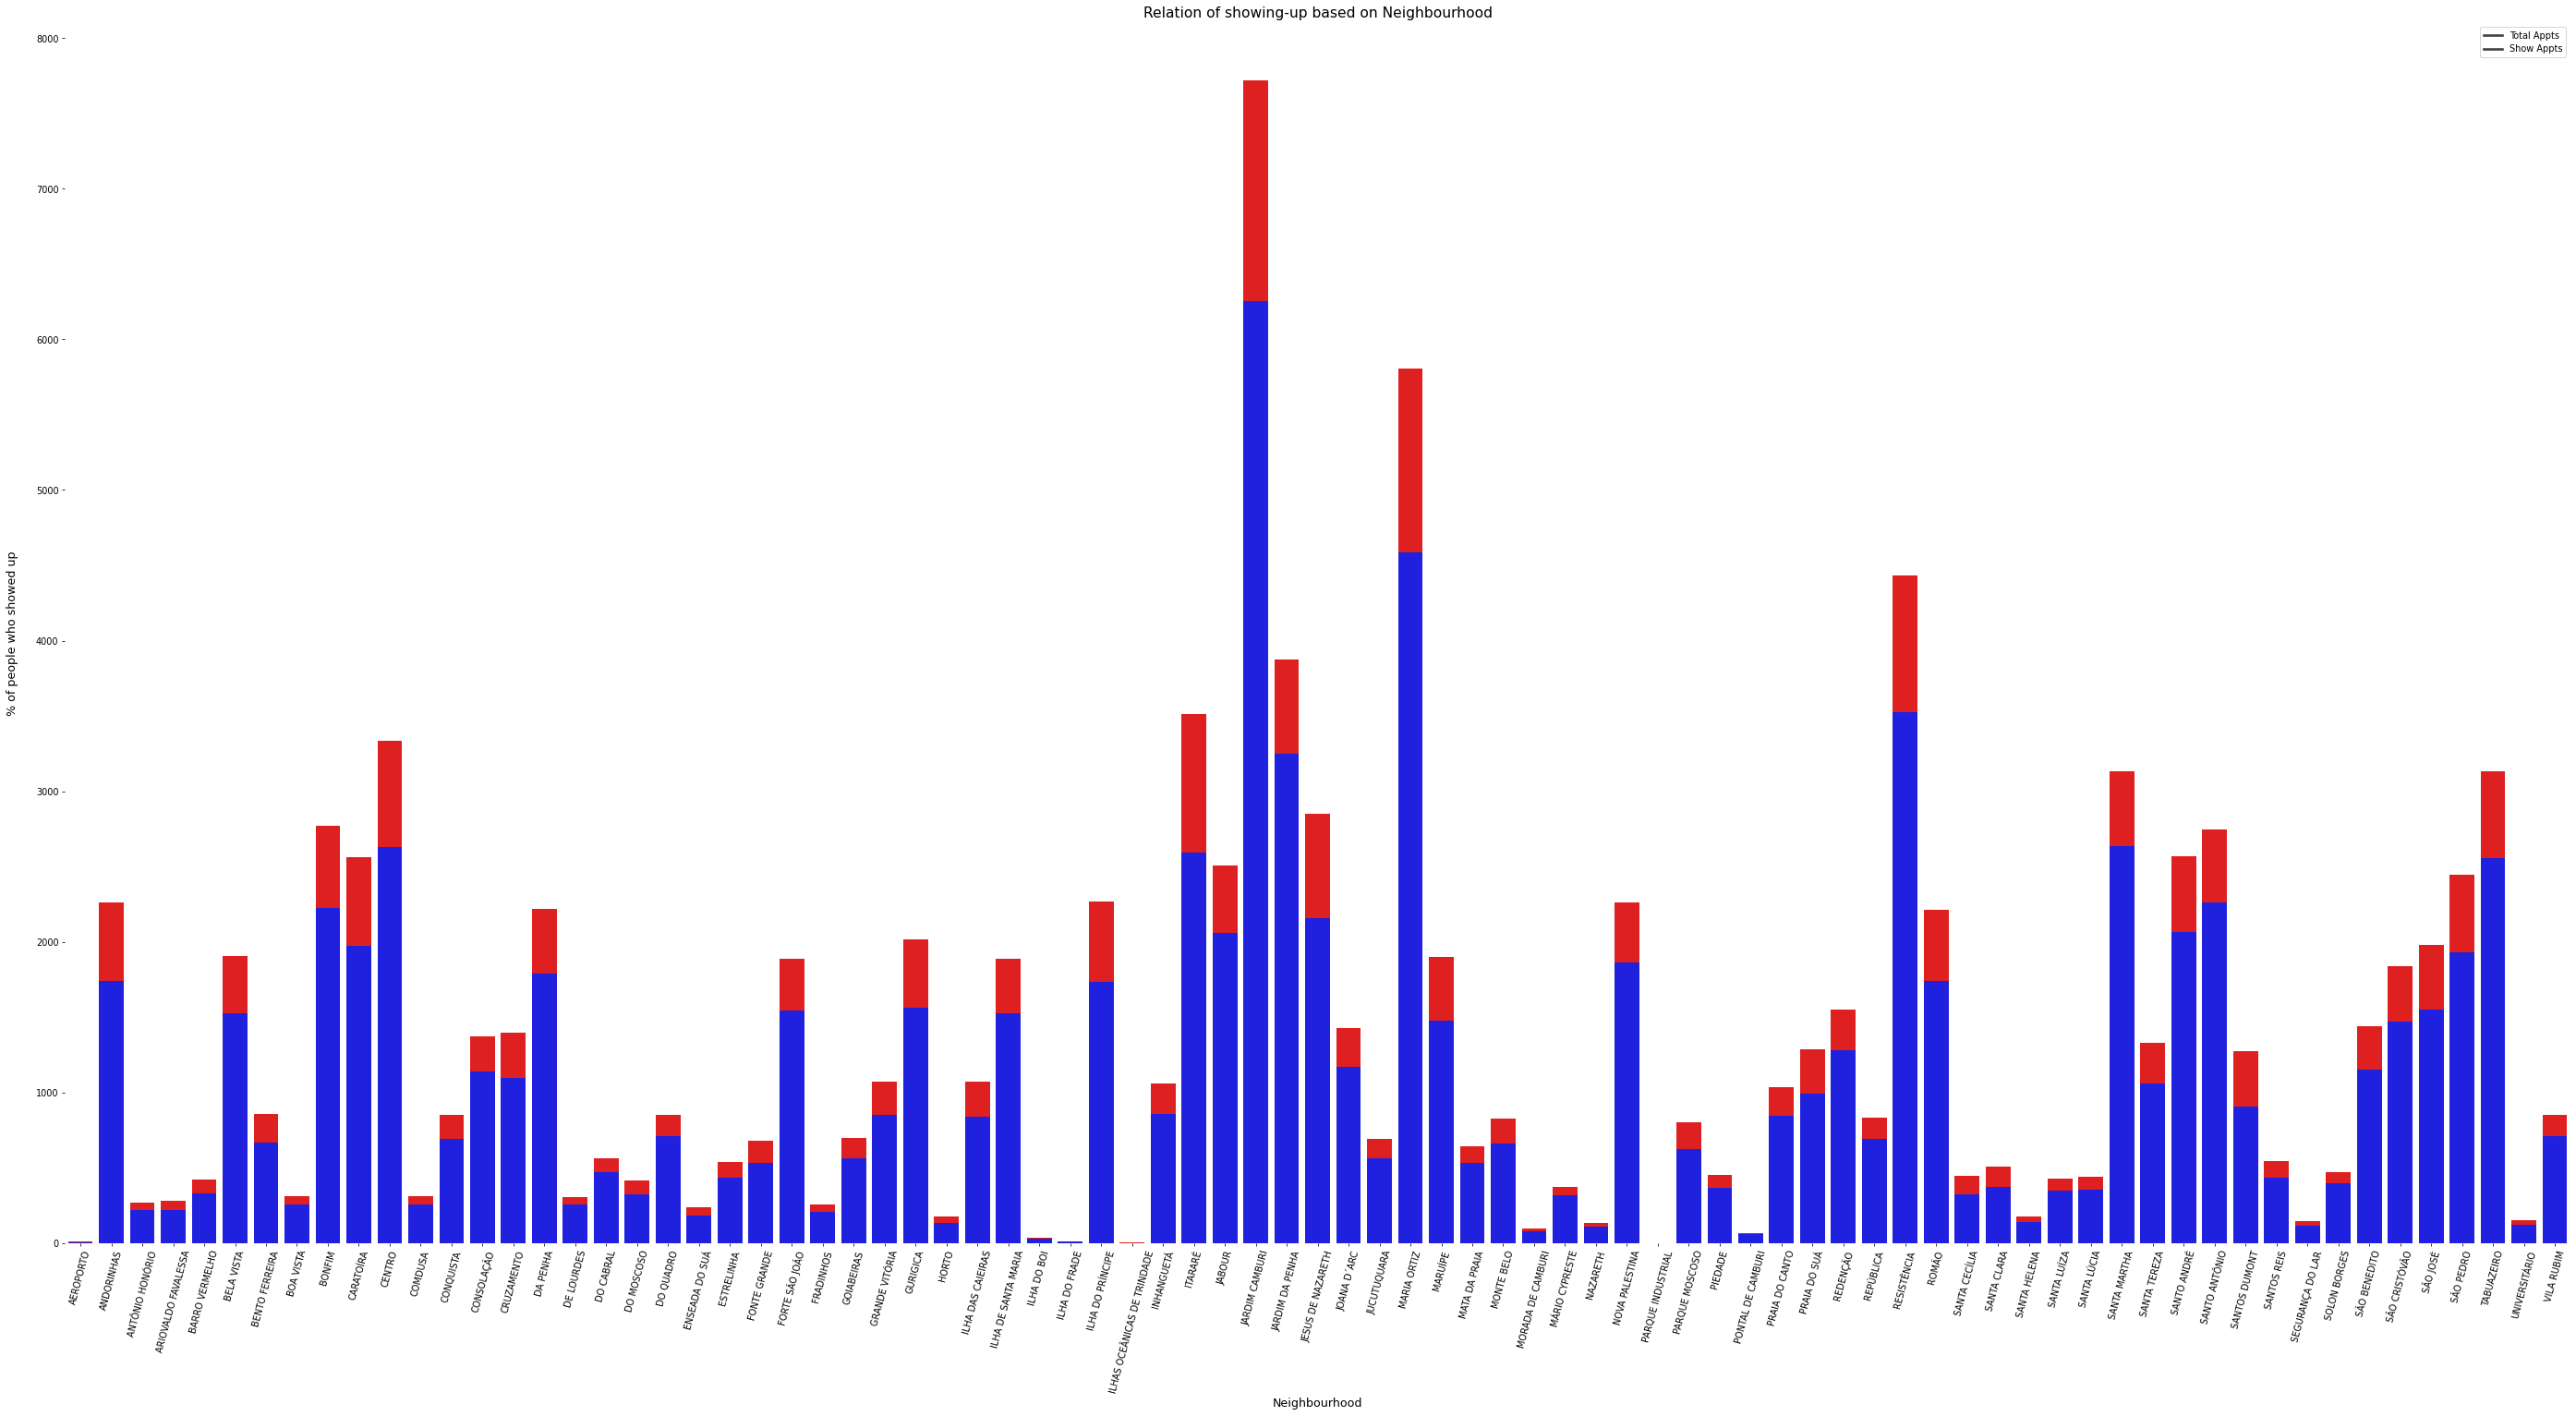

In [74]:
plt.figure(figsize=(50,25),dpi=70)
graph1 = sns.barplot(data=neighbour_df,x='neighbourhood',y='total_appointments',color='red')
graph2 = sns.barplot(data=neighbour_df,x='neighbourhood',y='show_appointments',color='blue')
graph1.set_xlabel('Neighbourhood',fontsize=13)
graph1.set_ylabel('% of people who showed up\n',fontsize=13)
graph1.set_title('Relation of showing-up based on Neighbourhood',fontsize=16)
sns.despine( left=True, bottom=True)
plt.xticks(rotation=75)

plt.legend(['Total Appts','Show Appts']);
print('Red bars represents total appointments\n') 
print('Blue bars represents actual show appointments\n')

### Neighbourhood where show-up rate is high

In [75]:
neigh_high_show = neighbour_df.nlargest(n=8,columns='show_prop')
neigh_high_show.show_prop = neigh_high_show.show_prop*100
neigh_high_show

,neighbourhood,total_appointments,show_appointments,show_prop
51,PARQUE INDUSTRIAL,1,1,100.000000
31,ILHA DO BOI,35,32,91.428571
0,AEROPORTO,8,7,87.500000
48,MÁRIO CYPRESTE,371,317,85.444744
73,SOLON BORGES,469,400,85.287846
16,DE LOURDES,305,258,84.590164
17,DO CABRAL,560,472,84.285714
66,SANTA MARTHA,3131,2635,84.158416


> Removing first 3 rows beacuse total appointments are very less from other neighbourhoods so concluding high show up rate in first three nighbourhood will be inappropriate

In [76]:
neigh_high_show = neigh_high_show.iloc[3:]
neigh_high_show

,neighbourhood,total_appointments,show_appointments,show_prop
48,MÁRIO CYPRESTE,371,317,85.444744
73,SOLON BORGES,469,400,85.287846
16,DE LOURDES,305,258,84.590164
17,DO CABRAL,560,472,84.285714
66,SANTA MARTHA,3131,2635,84.158416


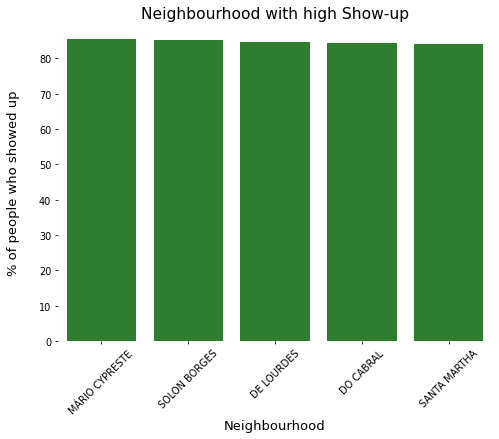

In [77]:
plt.figure(figsize=(8,6),dpi=70)
graph = sns.barplot(data=neigh_high_show,x='neighbourhood',y='show_prop',color='forestgreen')
graph.set_xlabel('Neighbourhood',fontsize=13.5)
graph.set_ylabel('% of people who showed up\n',fontsize=13.5)
graph.set_title('Neighbourhood with high Show-up',fontsize=16)
sns.despine( left=True, bottom=True)
plt.xticks(rotation=45);

> Show-up rate of all the above neighbourhoods is approximately equal to 85%

### Neighbourhood where show-up rate is low

In [78]:
neigh_low_show = neighbour_df.nsmallest(n=6,columns='show_prop')
neigh_low_show.show_prop = neigh_low_show.show_prop*100
neigh_low_show

,neighbourhood,total_appointments,show_appointments,show_prop
34,ILHAS OCEÂNICAS DE TRINDADE,2,0,0.000000
70,SANTOS DUMONT,1276,907,71.081505
61,SANTA CECÍLIA,448,325,72.544643
62,SANTA CLARA,506,372,73.517787
36,ITARARÉ,3514,2591,73.733637
40,JESUS DE NAZARETH,2853,2157,75.604627


> ILHAS OCEÂNICAS DE TRINDADE has only two appointments that is very less than other neighbourhoods so concluding low show-up rate of ILHAS OCEÂNICAS DE TRINDADE on the basis of only 2 appointments will be inappropriate

In [79]:
neigh_low_show = neigh_low_show.iloc[1:]
neigh_low_show

,neighbourhood,total_appointments,show_appointments,show_prop
70,SANTOS DUMONT,1276,907,71.081505
61,SANTA CECÍLIA,448,325,72.544643
62,SANTA CLARA,506,372,73.517787
36,ITARARÉ,3514,2591,73.733637
40,JESUS DE NAZARETH,2853,2157,75.604627


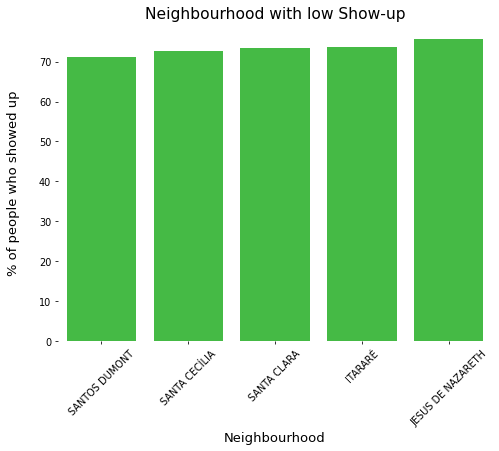

In [80]:
plt.figure(figsize=(8,6),dpi=70)
graph = sns.barplot(data=neigh_low_show,x='neighbourhood',y='show_prop',color='limegreen')
graph.set_xlabel('Neighbourhood',fontsize=13.5)
graph.set_ylabel('% of people who showed up\n',fontsize=13.5)
graph.set_title('Neighbourhood with low Show-up',fontsize=16)
sns.despine( left=True, bottom=True)
plt.xticks(rotation=45);

> All the above neighbourhoods have show-up rate between 71% to 75%

> 

## Day of the week
Day at which appointment is booked

In [81]:
appointment_day_of_week = pd.DataFrame()

In [82]:
appointment_day_of_week['total_dow'] = df.groupby('appointment_dow').show.count()
appointment_day_of_week['show_dow'] = df.groupby('appointment_dow').show.sum()
appointment_day_of_week['show_prop'] = df.groupby('appointment_dow').show.mean()
appointment_day_of_week.reset_index(inplace=True)

In [83]:
appointment_day_of_week

,appointment_dow,total_dow,show_dow,show_prop
0,Friday,19019,14982,0.787739
1,Monday,22713,18024,0.793554
2,Saturday,39,30,0.769231
3,Thursday,17246,13909,0.806506
4,Tuesday,25638,20488,0.799126
5,Wednesday,25866,20774,0.803139


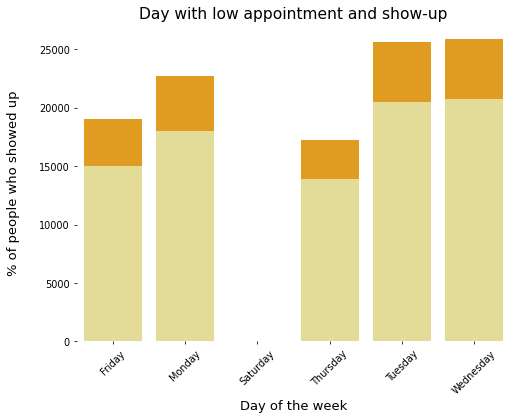

In [84]:
plt.figure(figsize=(8,6),dpi=70)
graph = sns.barplot(data=appointment_day_of_week,x='appointment_dow',y='total_dow',color='orange')
graph = sns.barplot(data=appointment_day_of_week,x='appointment_dow',y='show_dow',color='khaki')
graph.set_xlabel('Day of the week',fontsize=13.5)
graph.set_ylabel('% of people who showed up\n',fontsize=13.5)
graph.set_title('Day with low appointment and show-up',fontsize=16)
sns.despine( left=True, bottom=True)
plt.xticks(rotation=45);

> Saturday's have lowest appointments and Show-up rate

In [85]:
appointment_day_of_week['no_show_prop'] = 1 - appointment_day_of_week['show_prop']

In [86]:
appointment_day_of_week

,appointment_dow,total_dow,show_dow,show_prop,no_show_prop
0,Friday,19019,14982,0.787739,0.212261
1,Monday,22713,18024,0.793554,0.206446
2,Saturday,39,30,0.769231,0.230769
3,Thursday,17246,13909,0.806506,0.193494
4,Tuesday,25638,20488,0.799126,0.200874
5,Wednesday,25866,20774,0.803139,0.196861


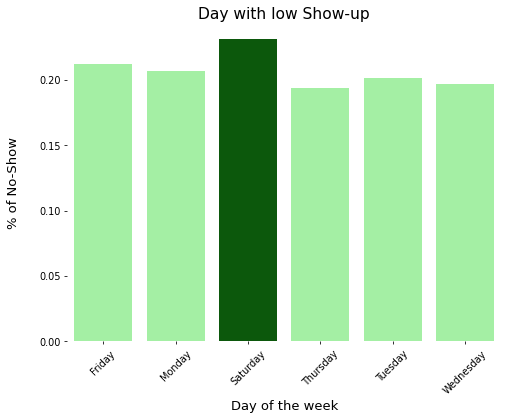

In [87]:
plt.figure(figsize=(8,6),dpi=70)
values = appointment_day_of_week.no_show_prop
clrs = ['palegreen' if (x < max(values)) else 'darkgreen' for x in values ]
graph = sns.barplot(data=appointment_day_of_week,x='appointment_dow',y='no_show_prop',palette=clrs)
graph.set_xlabel('Day of the week',fontsize=13.5)
graph.set_ylabel('% of No-Show\n',fontsize=13.5)
graph.set_title('Day with low Show-up',fontsize=16)
sns.despine( left=True, bottom=True)
plt.xticks(rotation=45);

> Saturday's have highest no-show ratio

## Relation of showing up wrt month

In [88]:
months = df.appointment_month.unique()
print(months)

['April' 'May' 'June']


In [89]:
appointment_month = pd.DataFrame()

In [90]:
appointment_month['total_appointments'] = df.groupby('appointment_month').show.count()
appointment_month['show_appointments'] = df.groupby('appointment_month').show.sum()
appointment_month['show_prop'] = df.groupby('appointment_month').show.mean()
appointment_month.reset_index(inplace=True)
appointment_month.show_prop = appointment_month.show_prop*100;

In [91]:
appointment_month

,appointment_month,total_appointments,show_appointments,show_prop
0,April,3235,2602,80.432767
1,June,26450,21568,81.542533
2,May,80836,64037,79.218418


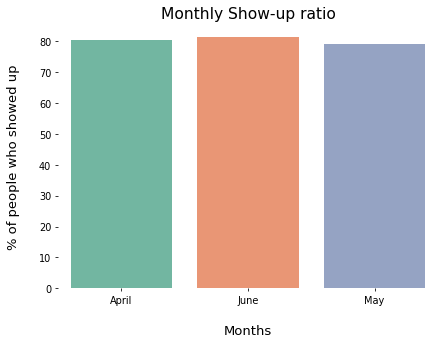

In [92]:
plt.figure(figsize=(7,5),dpi=70)
graph = sns.barplot(data=appointment_month,x='appointment_month',y='show_prop',palette='Set2')
graph.set_xlabel('\nMonths',fontsize=13.5)
graph.set_ylabel('% of people who showed up\n',fontsize=13.5)
graph.set_title('Monthly Show-up ratio',fontsize=16)
sns.despine( left=True, bottom=True)

> Show up rates for all three months are approximately similar.

> We can notice that number of appointments in month of May is almost three times from June and 26 times from April. 

# Conclusion

# Limitations


>Appointment Time in all the rows is same that is 00:00:00.
>>If appointment time was specified properly then we could have 
find time intervals over which people prefer to miss scheduled appointment

> Handicap section has five different values(0,1,2,3,4) but on Kaggle author describes it as column with boolean values where 0 represents person with no-handicap and 1 with handicap.
>> We have assumed that 1,2,3,4 are handicaps and changed them all to 1 to represent person with handicap. While 0 represents person with no handicap.

> Distance from neighbourhood to the hospital is not given

> Dataset only have data for month **April, May and June**. 
>> If data for other months was provided then we could have find months with least show-up rates.

## References

https://pubmed.ncbi.nlm.nih.gov/30209668/

https://wellapp.com/blog/patient-no-show-rates/